<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary package
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa

%matplotlib inline

Let's get the raw data using panda function.

In [ ]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')

Lets's look at our data.

In [ ]:
data

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Sophomore,F,Yes,Nobel,Verbal,2.0,0.0,83.0,130.0,1,1.0,550,540,1090,3.44,80,3.0
358,Sophomore,M,Yes,Olympic,Math,8.0,10.0,61.0,180.0,2,1.0,600,620,1220,3.00,74,0.0
359,Sophomore,F,Yes,Nobel,Verbal,1.0,1.0,65.0,150.0,2,2.0,540,450,990,3.27,78,2.0
360,FirstYear,M,Yes,Olympic,Verbal,14.0,5.0,77.0,205.0,2,2.0,550,550,1100,2.30,72,0.0


Looking at our data table, we can see that SAT is related to VerbalSAT and MathSAT.
$$
SAT = VerbalSAT + MathSAT
$$
So, lets use SAT and MathSAT to plot a graph.

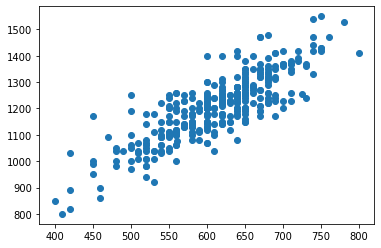

In [ ]:
plt.scatter(data["MathSAT"],data["SAT"])

In [ ]:
stats.pearsonr(data["MathSAT"],data["SAT"])

(0.8365916602784123, 4.093448362147636e-96)

Linear Regression

In [ ]:
def sum(data_list):
  sum = 0
  for i in data_list:
    sum += i
  return sum

def sum_of_square(data_list1, data_list2):
  sum = 0
  for i in range(len(data_list1)):
    sum = sum + data_list1[i]*data_list2[i]
  return sum

In [ ]:
n = len(data['MathSAT'])
xbar = sum(data['MathSAT'])/n
ybar = sum(data['SAT'])/n
xy = sum_of_square(data['MathSAT'],data['SAT'])
xx = sum_of_square(data['MathSAT'],data['MathSAT'])

slope = (xy-n*xbar*ybar)/(xx-n*xbar**2)
intercept = ybar - a1*xbar

In [ ]:
def fomulaRegression(variable,slope, intercept):
  return variable*slope+intercept

In [ ]:
print(f"slope = {slope}")
print(f"intercept = {intercept}")

Python has a builtin 